DEBUG:cmdstanpy:input tempfile: /tmp/tmpcev2zfs6/zzvhbw58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcev2zfs6/eole_mbb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5071', 'data', 'file=/tmp/tmpcev2zfs6/zzvhbw58.json', 'init=/tmp/tmpcev2zfs6/eole_mbb.json', 'output', 'file=/tmp/tmpcev2zfs6/prophet_modelo8yixd22/prophet_model-20250414004509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


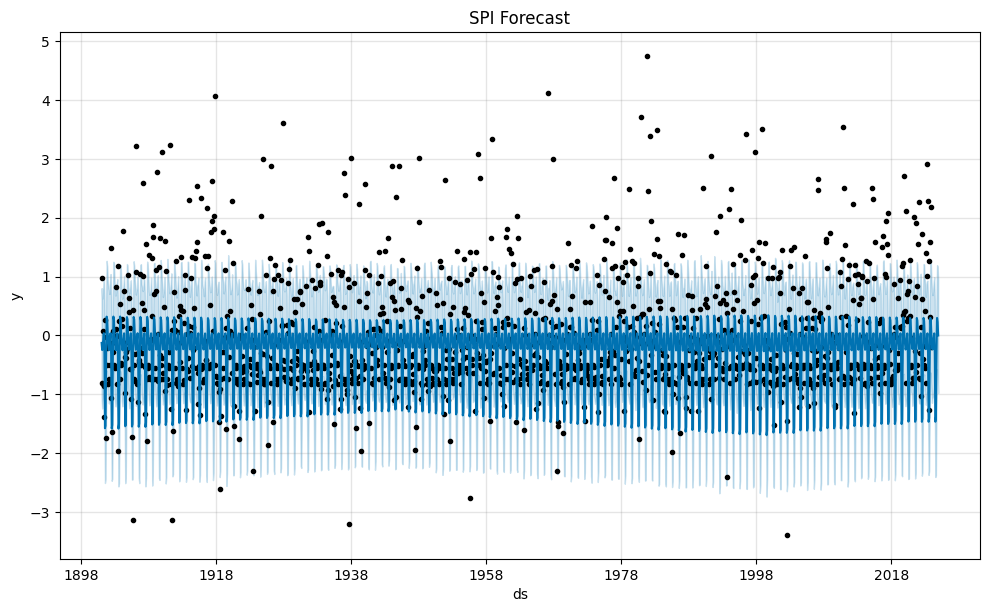

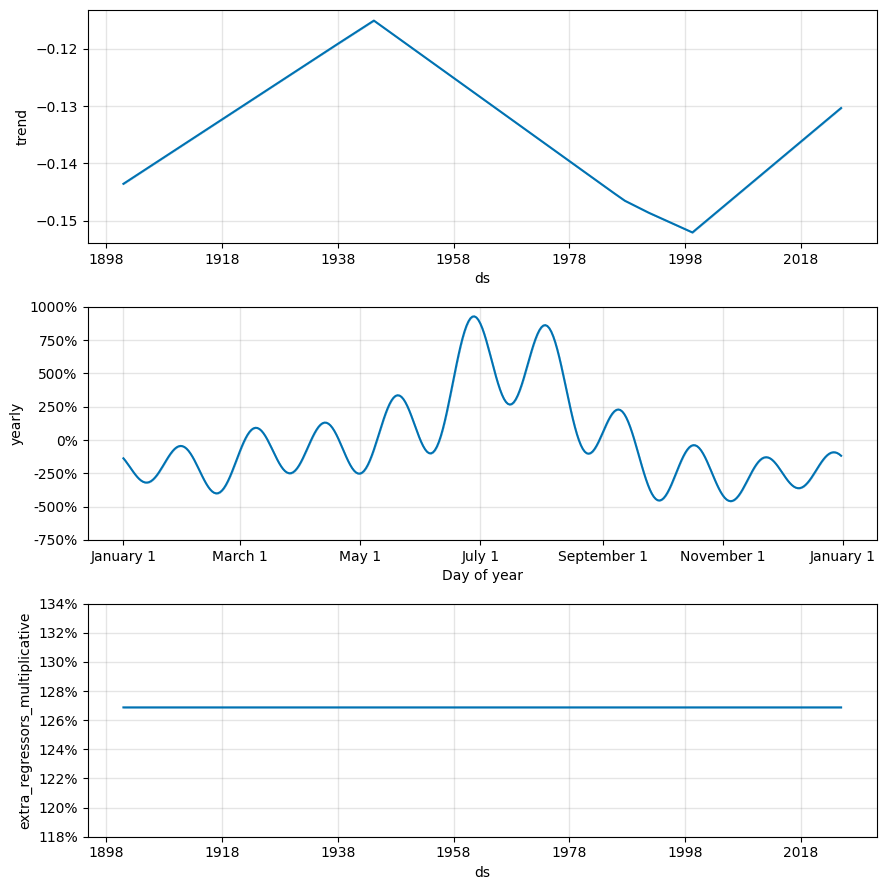

INFO:prophet:Making 244 forecasts with cutoffs between 1903-03-01 00:00:00 and 2022-12-01 00:00:00


  0%|          | 0/244 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcev2zfs6/wyqizc7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcev2zfs6/rjghfblg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6074', 'data', 'file=/tmp/tmpcev2zfs6/wyqizc7z.json', 'init=/tmp/tmpcev2zfs6/rjghfblg.json', 'output', 'file=/tmp/tmpcev2zfs6/prophet_modelo9q9rpw1/prophet_model-20250414004518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcev2zfs6/_ay_n8m8.json
DEBUG:cmdstanpy:input tempfil

Cross-validation performance metrics:
     horizon       mse      rmse       mae      mape     mdape     smape  \
0    37 days  0.503950  0.709894  0.555790  1.783433  0.816967  1.181135   
1    38 days  0.497170  0.705103  0.550661  1.779744  0.812709  1.178577   
2    39 days  0.500771  0.707652  0.553349  1.789302  0.830459  1.182197   
3    40 days  0.501998  0.708518  0.555056  1.799391  0.834304  1.188425   
4    41 days  0.538003  0.733487  0.564849  1.777142  0.834769  1.186807   
..       ...       ...       ...       ...       ...       ...       ...   
324 361 days  0.993473  0.996731  0.673929  1.164808  0.822144  1.197560   
325 362 days  1.001065  1.000532  0.679443  1.136899  0.813039  1.187109   
326 363 days  1.000950  1.000475  0.679513  1.111656  0.809183  1.176974   
327 364 days  0.997914  0.998956  0.681350  1.098848  0.798950  1.178427   
328 365 days  0.957565  0.978552  0.669200  1.139072  0.813039  1.192845   

     coverage  
0    0.867580  
1    0.869863  
2

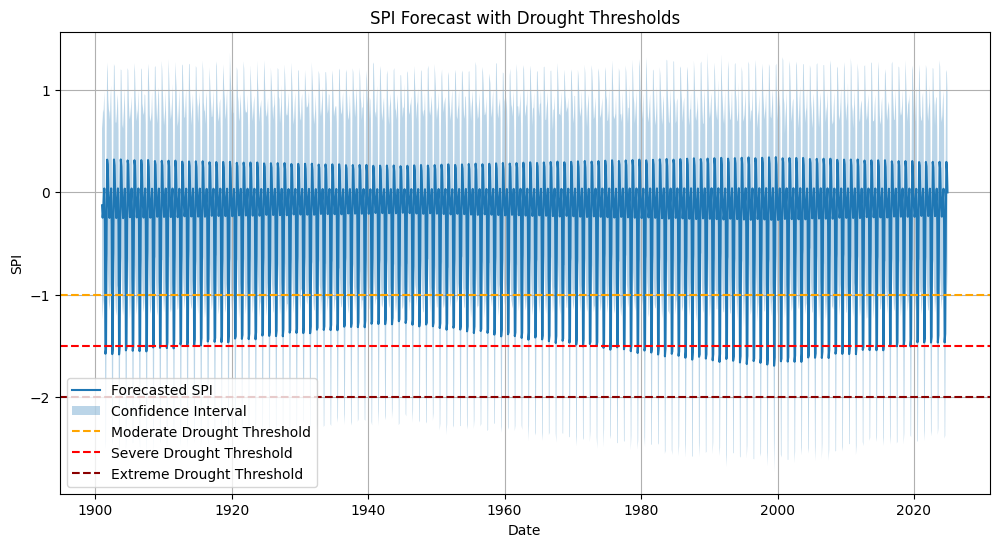

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load and prepare the dataset
# Replace 'your_data.csv' with your actual file name
df = pd.read_csv('dataset_final_wre.csv')

# Step 2: Data preprocessing
# Create a datetime column from year and month
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Prophet requires specific column names: 'ds' for date and 'y' for target variable
prophet_df = df[['date', 'SPI']].rename(columns={'date': 'ds', 'SPI': 'y'})

# Step 3: Add regressors (optional but likely beneficial)
for regressor in ['Average Rainfall', 'nino3', 'nino3.4', 'nino4',
                 'Arabian_Sea', 'equatorialindianocean', 'bayofbengal']:
    prophet_df[regressor] = df[regressor]

# Step 4: Initialize and fit the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'  # You may need to experiment with this
)

# Add regressors to the model
for regressor in ['Average Rainfall', 'nino3', 'nino3.4', 'nino4',
                 'Arabian_Sea', 'equatorialindianocean', 'bayofbengal']:
    model.add_regressor(regressor)

# Fit the model
model.fit(prophet_df)

# Step 5: Make future predictions
# Create a future dataframe for the forecast period
future_periods = 12  # Forecasting for next 12 months, adjust as needed
future = model.make_future_dataframe(periods=future_periods, freq='M')

# Add regressor values for future periods
# This requires you to have or predict future values for these variables
# For demonstration, we'll use the last available values
for regressor in ['Average Rainfall', 'nino3', 'nino3.4', 'nino4',
                 'Arabian_Sea', 'equatorialindianocean', 'bayofbengal']:
    future[regressor] = prophet_df[regressor].iloc[-1]  # Using last value, replace with actual predictions

# Step 6: Generate forecast
forecast = model.predict(future)

# Step 7: Visualize the results
fig1 = model.plot(forecast)
plt.title('SPI Forecast')
plt.show()

# Plot components to understand trend, yearly seasonality, and regressor effects
fig2 = model.plot_components(forecast)
plt.show()

# Step 8: Evaluate model performance
# Cross-validation
cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
cv_performance = performance_metrics(cv_results)
print("Cross-validation performance metrics:")
print(cv_performance)

# Step 9: Interpret SPI values for drought conditions
# Define drought categories based on SPI values
def interpret_drought(spi):
    if spi <= -2.0:
        return "Extreme Drought"
    elif spi <= -1.5:
        return "Severe Drought"
    elif spi <= -1.0:
        return "Moderate Drought"
    elif spi <= -0.5:
        return "Mild Drought"
    elif spi < 0.5:
        return "Near Normal"
    elif spi < 1.0:
        return "Mildly Wet"
    elif spi < 1.5:
        return "Moderately Wet"
    elif spi < 2.0:
        return "Severely Wet"
    else:
        return "Extremely Wet"

# Apply drought interpretation to forecasted SPI values
forecast['drought_category'] = forecast['yhat'].apply(interpret_drought)

# Print forecast with drought categories for future periods
future_forecast = forecast[forecast['ds'] > prophet_df['ds'].max()]
print("\nFuture SPI and Drought Forecasts:")
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'drought_category']])

# Step 10: Create a drought probability visualization
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted SPI')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                alpha=0.3, label='Confidence Interval')

# Add drought thresholds
plt.axhline(y=-1.0, color='orange', linestyle='--', label='Moderate Drought Threshold')
plt.axhline(y=-1.5, color='red', linestyle='--', label='Severe Drought Threshold')
plt.axhline(y=-2.0, color='darkred', linestyle='--', label='Extreme Drought Threshold')

plt.title('SPI Forecast with Drought Thresholds')
plt.xlabel('Date')
plt.ylabel('SPI')
plt.legend()
plt.grid(True)
plt.show()